# Работа с нейронными сетями

## Анатомия нейронной сети

Обучение нейронной сети "вращается" вокруг следующих объектов:
* Слои (layers), которые комбинируются в сеть (модель);
* Входные данные (input data) и соответствующие ответы (targets);
* Функцию потерь, которая определяет обратный сигнал, который используется для обучения;
* Оптимизатор, определяющий как происходит обучение;

Их взаимодействие можно визуализировать сл. образом: сеть, составленная из слоев, собранных вместе отображает входные данные (inpute data) в предсказания (predictions).

Функция потерь (loss function) затем сравнивает эти предсказания с целевыми (targets), порождая стоимость потерь (loss value) являющуюся мерой насколько хорошо предсказания сети соответствуют истинным ответам. Оптимизатор использует стоимость потерь (loss value) чтобы обновить веса сети.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/deep-learning-in-3-figures-3_alt.png)



## Пример: бинарная классификация
### IMDB dataset

IMDB Dataset представляет собой множество из 50 000 обзоров с сайта IMDB. Они разделены: 25 000 обзоров на тренировочную и 25 000 обзоров на тестовую выборки, каждое множество содержит 50% негативных и 50% позитивных отзывов.

Как и MNIST, набор данных IMDB предоставляется фреймворком Keras. Он уже предобработан: отзывы (последовательности слов) уже переведены в последовательности целых чисел, где каждое целое число соответствует своему слову в словаре.

Ниже приведен пример загрузки этого набора данных (потребуется как минимум 80 Mb):

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17424384/17464789 [============================>.] - ETA: 0s

Аргумент **num_words = 10000** означает, что мы будем использовать только 10 000 самых частовстречающихся слов в тренировочной выборке. Редкие слова будут отброшены. Это позволяет нам работать с вектором данных управляемого размера.

Переменные **train_data** и **test_data** представляют собой списке обзоров, где каждый обзор является списком индексов слов (кодируют последовательности слов).
**train_labels** и **test_labels** являются списками 0 и 1, где 0 соответствует *негативному отзыву* и 1 соответствует *позитивному отзыву*.

Рассмотрим тренировочные данные и их метки:

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

Поскольку мы ограничили себя 10 000 самых частовстречаемых слов, нет индексов слов, которые превосходят эту цифру. 
Проверим это:

In [4]:
max([max(sequence) for sequence in train_data])

9999

А вот так мы можем быстро декондировать отзыв обратно в слова:

In [5]:
# word_index - словарь, отображающий слова в целые числа
word_index = imdb.get_word_index()

# Мы "обращаем" его, отображая целые числа в слова
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Теперь декодируем отзыв 
# Заметим, что индексы "смещены" на 3
# 0,1,2 зарезервировано для padding, начала последовательности и "неизвестного" 

decoded_review  = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1605632/1641221 [============================>.] - ETA: 0s

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Подготовка данных

Мы не можем сразу же отправить списки чисел в нейронную сеть. Мы должны преобразовать эти списки в тензорный формат.
Есть два способа, чтобы сделать это:

* Можно выровнять списки таким образом, чтобы они имели одинаковую длину и преобразовать их в целочисленный тензор размерности $(samples; word\_indices)$, а затем использовать как первый слой в нашей нейросети как слой, способный обрабатывать такие целочисленные тензоры (т.н. Embedding слой - который будет рассмотрен в дальнейшем курсе лекций).
* Можно произвести унитарное кодирование (one hot encode) списков чтобы преобразовать их в векторы нулей и единиц. Например, преобразование последовательности [3;5] в 10 000-мерный вектор, будет содержать все нули, за исключением 3 и 5 компонент, которые будут равны единице. Затем, мы можем использовать как первый слой в сети плотный слой (Dense layer), способный обрабатывать вещественные вектора данных.

Рассмотрим (пока) последнее решение. Векторизуем данные самостоятельно:

In [ ]:
# Преобразование последовательности целых чисел в бинарную матрицу
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    # Создание нулевой матрицы:
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Устанавливаем конкретные индексы в единицу
        results[i, sequence] = 1
    return results

# Векторизация тренировочной выборки
x_train = vectorize_sequences(train_data)
# Векторищация тестовой выборки
x_test = vectorize_sequences(test_data)

Посмотрим на результат:

In [13]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

Также следует векторизовать метки классов.
Что достаточно просто:

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Итак, сейчас данные готовы к передачи в нейронную сеть

## Построение нейронной сети

Входные данные в нашем случае представляют собой вектора, а метки - скаляры (0 и 1): это достаточно простая конфигурация.

Тип сети, который достаточно хорошо справляется с рассматриваемой проблемой (точнее, представлением) - просто стек плотных слоев (dense layers) с функцией активации relu:
    Dense(16, activation='relu')
   
Аргумент 16 - это число "скрытых единиц (hidden unit)" в слое. Что такое hidden unit? Это размер в пространстве представления слоя (representation space of the layer).

Каждый слой Dense с функцией активации relu выполняет следующую цепочку операций на тензорах:
$$ output = relu(Wx + b)$$
где $x$ - входной вектор.

16 скрытых единиц будет означать, что матрица весов $W$ будет иметь пространство $(input\_dimension, 16)$, т.е. скалярное произведение $W$ с входным вектором будет проецировать входные данные в 16 мерное пространство представления слоя (и затем мы можем добавить вектор смещения $b$ и применить операцию ReLU). 

Интуитивно, это можно понимать размерность пространства представления как "как много свободы вы даете нейросети при изучении внутренних репрезентаций".
Чем больше скрытых единиц (многомерное пространство представления) позволяет нейронной сети изучить более сложные репрезентации, но это делает вашу сеть более дорогостоящей в вычислительном плане и может привести к нежелательным паттернам (например, переобучению).

Необходимо сделать два ключевых архитектурных решения как "складывать" плотные слои:
* Как много слоев использовать;
* Как много "скрытых единиц" выбрать для каждого слоя.

В последующем мы рассмотрим формальные принципы. Но сейчас остановимся на сл. архитектуре:
* два промежуточных слоя с 16 скрытыми единицами;
* третий слой, который выводит скалярное предсказание относительно тональности текущего текста (обзора);

Промежуточгные слои будут использовать в качестве функции активации ReLU, а финальный уровень будет использовать сигмоидальную функцию активации, чтобы получить вероятность.

Функция ReLU:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/relu.png)

Сигмоидальная функция:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/sigmoid.png)

Итак, наша нейронная сеть будет выглядеть сл. образом:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/3_layer_network.png)

Определим эту нейросеть на Keras:

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Ремарка: Что такое функции активации и почему они необходимы?

Без использования функций активации (например, relu), плотный слой Dense будет содержать просто две линейные операции: скалярное произведение и сложение:
$$ output = Wx + b$$

Поэтому, слой может обучаться только линейным преобрразованиям (ффинным преобразованиям) входных данных, т.е. пространство гипотез слоя может быть лишь множеством всевозможных линейных преобразований входных данных в 16 мерном простраранстве. Такое пространство гипотез достаточно ограничено и мы не будем иметь каких-либо преимуществ от подобных репрезентаций (**почему???**).

Для того, чтобы расширить пространство гипотез, и получать преимущество оот глубоких прдставлений, необходима нелинейность, или функции активации. 
ReLU - одна из самых популярных функций активации в глубоком обучении, но существует также много других функций активации со странными именами: prelu, elu, и т.д.

Наконец, нам нужно выбрать функцию потерь и оптимизатор. Мы рассматриваем проблему бинарной классификации, а на выходе сети получаем вероятность, поэтому наилучшей функцией потерь является бинарная кросс-энтропия **binary_crossentropy**. 

Это не единственный выбор, вы можете выбрать хоть **mean_squared_error**. Но росс-энтропия **обычно** является наилучшим выбором, в тех случаях, когда мы имеем дело с моделями, выходом которых являются вероятности.

Кросс-энтропия - это количественная мера из области теории информации, которая измеряет "дистанцию" между вероятностными распределениями, или , в нашем случае, между истинным распределением и нашими предсказаниями.

Еще одним шагом при определении нашей модели является выбор оптимизатора. Мы сконфигурируем нашу модель с оптимизатором rmsprop и бинарной кросс-энтропией как функцию потерь.
Также укажем, что мы хотим мониторить точность в ходе обучения.

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Мы передали параметры как строки, что является возможным, поскольку rmsprop, banary_crossentropy и accuracy являются частью Keras.

Иногда Вы можете захотеть сконфигурировать параметры оптимизатора, или передать произвольную функцию потерь, или произвольную метрику.
Это может быть сделано передачей объекта класса optimizer как аргумента.


In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Проверка подхода

Чтобы мониторить точность модели в ходе обучения на данных которые никогда ранее не встречались, создается так называемая контрольная выборка (validation set):

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Обучим нашу модель на 20 эпох (т.е. 20 итераций по всем объектам в тензорах X_train и y_train) в мини-пакетах (mini-batches) по 512 объектов.

В то же время, будем мониторить потери и точность на 10 000 объектах контрольной выборки. Это делается посредством передачи контрольных данных с помощью аргумента validation_data:


In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 24s - loss: 0.5136 - binary_accuracy: 0.7920 - val_loss: 0.4026 - val_binary_accuracy: 0.8628
Epoch 2/20
15000/15000 [==============================] - 4s - loss: 0.3132 - binary_accuracy: 0.9033 - val_loss: 0.3171 - val_binary_accuracy: 0.88290.
Epoch 3/20
15000/15000 [==============================] - 3s - loss: 0.2294 - binary_accuracy: 0.9249 - val_loss: 0.2799 - val_binary_accuracy: 0.8917
Epoch 4/20
15000/15000 [==============================] - 3s - loss: 0.1794 - binary_accuracy: 0.9428 - val_loss: 0.2734 - val_binary_accuracy: 0.8907
Epoch 5/20
15000/15000 [==============================] - 3s - loss: 0.1481 - binary_accuracy: 0.9528 - val_loss: 0.2788 - val_binary_accuracy: 0.8889
Epoch 6/20
15000/15000 [==============================] - 3s - loss: 0.1195 - binary_accuracy: 0.9630 - val_loss: 0.3257 - val_binary_accuracy: 0.8798
Epoch 7/20
15000/15000 [=================

По завершении каждой эпохи, происходит вычисление точности и потери на 10 000 объектов контрольной выборки.

Следует также щаменить, что model.fit() возвращает объект класса History. Этот объект имеет поле history, являющееся словарем, содержащим данные обо всем, что происходит во время обучения.

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

Он содержит 4 поля: по одной метрике, которая мониторилась во время обучения и проверки.
Используя Matplotlib можно построить графики потерь для тернировочной и контрольной выборки, как и верность.


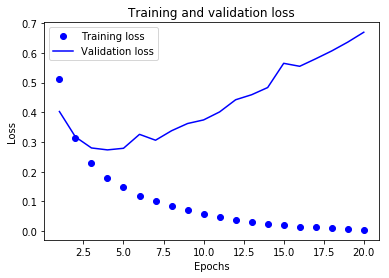

In [22]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

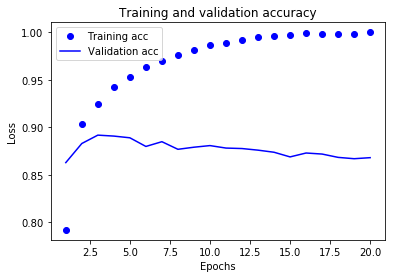

In [24]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Значение потерь на тренировочной выборки уменьшается с каждой эпохов, в то время как точность на тренировочной выборке возрастает. 
Это то, что мы ожидаем от градиентного спуска - количественные показатели, которые должны минимизироваться с каждой итерацией. Но это не так для функции потерь в контрольной выборке! Они достигают пика гд-то в 4 эпоху. 

Это как раз тот случай, о котором мы говорили ранее: модель все лучше описывает данные на тренировочной выборке и в результате начинает излишне адоптироваться к ней, мешая, таким образом, генерализации.

В нашем простом случае, чтобы предотвратить переобучение достаточно было бы остановить обучение после 3 эпох. Разумеется, есть и более сложные методы борьбы с переобучением.



In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 14s - loss: 0.4717 - acc: 0.8106    
Epoch 2/4
25000/25000 [==============================] - 4s - loss: 0.2651 - acc: 0.9080     
Epoch 3/4
25000/25000 [==============================] - 4s - loss: 0.2023 - acc: 0.9277     
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s

In [26]:
results

[0.2911977368068695, 0.88500000000000001]

Итак, наш наивный подход достиг точности 88%. Современные подходы способны приблизиться к 95% точности.

## Использование обученной модели для генерации предсказаний на новых данных

После обучения нейронной сети, её можно использовать на практике. Можно породить вероятность позитивной тональности с использованием метода predict:

In [27]:
model.predict(x_test)

array([[ 0.923392  ],
       [ 0.83488482],
       [ 0.99946672],
       ..., 
       [ 0.44186568],
       [ 0.00358829],
       [ 0.80997139]], dtype=float32)

Как можно заметить, нейронная сеть очень уверена для одних ответов (вероятность более 0.99, или менее 0.01) но менее уверена для других.

**Упражнения:**
* Использовались 2 скрытых уровня сети. Попробуйте использовать 1 или 3 скрытых уровня нейронной сети и посмотрите как это влияет на точность контрольной и тестовой выборки;
* Попробуйте использовать слои с большим числом скрытых единиц (нейронов) в слое: 32, 64 и т.д.
* Попробуйте использовать mse в качестве функции потерь (вместо binary_crossentropy); 
* Попробуйте использовать в качестве функции активации tanh (вместо relu);

## Пример: многоклассовая классификация (классификация новостей)

Итак, мы рассмотрели, как классифицировать данные, с двумя взаимоисключающими классами с использованием плотной нейронной сети.

Но что происходит когда классов больше двух?

Рассмотрим другой case: построим нейронную сеть, для классификации новостей из Reuters по 46 разным взаимоисключающим категориям.
Эта проблема называется многоклассовой классификацией (multiclass classification).

### Reuters dataset

Будем работать с набором данных Reuters, который содержит множество коротких новостей и их темы, опубликованые Reuters в 1986 году. Это достаточно простой, широко распространенный набор для классификации.
Есть 46 тем, некоторые темы более репрезентативны, чем другие, но каждая тема имеет как минимум 10 обхектов в тренировочной выборке.

Как и IMDB и MNIST, Reuters поставляется как часть Keras.

In [28]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2023424/2110848 [===========================>..] - ETA: 0s

Как и с IMDB ограничим себя 10 000 наиболее частовстречающимися словами.

Посмотрим на объем выборки:

In [29]:
len(train_data)

8982

In [30]:
len(test_data)

2246

Построим декодер, чтобы мы могли преобразовывать цифровую репрезентацию отзыва в обычные слова:

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

540672/550378 [============================>.] - ETA: 0s

Метки, ассоциированные с примерами пронумерованы числами от 0 до 45: индекс темы.

In [32]:
train_labels[10]

3

### Подготовка данных

Мы можем векторизовать данные таким же образом, как и ранее:

In [33]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Для векторизации меток есть две возможности:
* Использовать список меток как целочисленный тензор;
* Использовать унитарное кодирование;

Унитарное кодирование (one-hot encoding) - ширико используемый формат для категориальных данных, также называемый категориальным кодированием.

В нашем случае, унитарное кодирование меток состоит в том, что каждой метке ставится в соответствие вектор, содержащий единицу в размерности, равной индексу метки, а в остальных компонентах - нули.


In [34]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Следует, однако, заметить, что Keras предоставляет возможность преобразования в категориальную форму встроенной функцией.

In [35]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Построение нейронной сети

Задача классификации тематики похожа на задачу классификации отзывов: в обоих случаях мы пытаемся классифицировать короткие сниппеты текста.

Фундаментальным отличием является то, что число классов возрастает от 2 до 46, т.е. размерность выходного пространства значительно вырастает.

При "стекинге " плотных слоев (Dense layer) нейронной сети каждый слой может иметь доступ только к информации, представленной в результатах предыдущего слоя.

Если один слой "отбрасывает" некоторую важную информацию, релевантную задаче классификации, эта информация уже не может быть восстановлена на последующих уровнях: каждый слой может иметь потенциальные **"information bottleneck"**. 

В предыдущем примере мы использовали 16 мерные промежуточные слои, но пространство размерности 16 может быть слишком ограниченым, чтобы научиться отличать 46 различных классов! Такие малые слои могут выступать как узкие места, перманентно отбрасывая релевантную информацию.

По этим причинам будем использовать слои с 64 нейронами.

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Нужно также отметить еще две вещи относительно текущей архитектуры:

* Мы завершаем нейронную сеть с плотным слоем (Dense layer) размером 46. Это означает, что для каждого входого объекта, сеть будет порождать вектор, размерности 46. Каждый элемент в таком векторе (т.е. каждая размерность) будет кодировать разный выходной класс.
* Последний уровень использует softmax в качестве функции активации. Это означает, что сеть будет порождать веротяностное распределение над 46 различными выходными классами, т.е. для каждого входого объекта, сеть будет порождать выходной вектор, размерности 46.

Исползуемая функция потерь в этом случае: категориальная кросс-энтропия (categorial_crossentropy). Она измеряет дистанцию между двумя вероятностными распределениями: в нашем случае, разность между вероятностным распределением, порождаемым нашей сетью и истинным распределением меток.

Минимизацией расстояние между этими двумя распределением мы обучаем нашу нейронную сеть порождать метки максимально близкие к истинным.

In [37]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Валидация подхода

Разобьем тренировочную выборку, так чтобы использовать контрольную выборку.

После чего бучим нашу сеть на 20 эпох.

In [38]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 2s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 2s - loss: 0.3704 - a

Построим график функции потерь и верности:

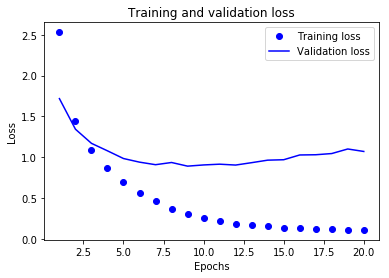

In [40]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

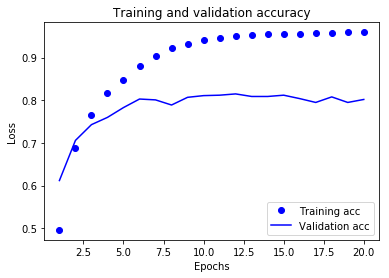

In [41]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Похоже, что сеть начинает переобучаться через 9 эпох. Обучим сетку с нуля, за девять эпох и оценим результаты на тестовой выборке.


In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 2s - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s - loss: 1.0207 - acc: 0.7781 - val_loss: 1.1321 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 2s - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 2s - loss: 0.6392 - acc: 0.8629 - val_loss: 0.9753 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s - loss: 0.4115 - acc: 0.9141 - val_loss: 0.8913 - val_acc: 0.8240
Epoch 8/9
7982/7982 [==============================] - 2s - loss: 0.3357 - acc: 0.92

In [43]:
results


[1.0225298037405854, 0.77738201251968353]

Наш подход достигает точности ~78%. В случае сбалансированной задачи бинарной классификации, точность, достигаемая случайным классификатором, составит 50%.
В нашем случае она ближе к 19%, поэтому наши результаты кажутся достаточно хорошими, по сранвнению со случайной базой.

### Генерация предсказаний на новых данных

Мы можем убедиться, что метод predict нашей модели возвращает вероятностное распределение над всеми 46 темами.
Сгенерируем предсказания для всех тестовых данных:

In [44]:
predictions = model.predict(x_test)

Каждый элемент в predictions представляет собой вектор размерности 46:

In [45]:
predictions[0].shape

(46,)

Сумма его коэффициентов равна единице:

In [46]:
np.sum(predictions[0])

1.0000001

### Еще один способ обработки меток и потери

Ранее было упомянуто, что еще один способ кодирования меток может заключаться в их преобразовании в целочисленный тензор:

In [47]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Следует, однако, отметить, что это приведет к изменению в выборе функции потерь. Предыдущая функция потерь, категориальная кросс-энтропия (categorial_crossentropy) ожидает, что метки будут соответствовать категориальному кодирования. С целочисленными метками следует использовать **sparse_categorial_crossentropy**:

In [48]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Эта "новая" функция потерь с математической точки зрения остается той же самой, что и categorial_crossentropy, однако она будет иметь другой интерфейс.

### О важности наличия достаточно больших промежуточных слоев

Ранее было упомянуто, что поскольку финальный выход 46 мерный, то нам следует избегать промежуточных слоев с менее чем 46 скрытыми нейронами. 

Попытаемся увидеть, что произойдет, когда мы введем information bottleneck - промежуточные слои значительно меньшие чем с 46 скрытыми нейронами (например, размерности 4).


In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s - loss: 3.1689 - acc: 0.2447 - val_loss: 2.6152 - val_acc: 0.2720
Epoch 2/20
7982/7982 [==============================] - 3s - loss: 2.0600 - acc: 0.5428 - val_loss: 1.7015 - val_acc: 0.5870
Epoch 3/20
7982/7982 [==============================] - 3s - loss: 1.5001 - acc: 0.6253 - val_loss: 1.5088 - val_acc: 0.6440
Epoch 4/20
7982/7982 [==============================] - 3s - loss: 1.2854 - acc: 0.6917 - val_loss: 1.4107 - val_acc: 0.6760
Epoch 5/20
7982/7982 [==============================] - 3s - loss: 1.1434 - acc: 0.7155 - val_loss: 1.3671 - val_acc: 0.6820
Epoch 6/20
7982/7982 [==============================] - 3s - loss: 1.0390 - acc: 0.7310 - val_loss: 1.3435 - val_acc: 0.6970
Epoch 7/20
7982/7982 [==============================] - 3s - loss: 0.9566 - acc: 0.7419 - val_loss: 1.3399 - val_acc: 0.69900.7
Epoch 8/20
7982/7982 [==============================] - 3s - loss: 0.8866 

Сеть показывает на контрольной выборке верность равную ~71%. Т.е. абсолютное падение на 9%. 

Причина этого падения, преимущественно в том, что сейчас мы пытаемся "сжать" много информации в промежуточном слое, размерность которого слишком мала. 

Сеть может втиснуть большую часть необходимой информации в это представление, но далеко не всю.

**Упражнения**
* Попробуйте слои с большим и меньшим числом нейронов: 32, 128 и т.д.
* Попробуйте 1 скрытый слой, три скрытых слоя и т.д.


## Решение задачи регрессии с помощью нейронных сетей

В предыдущих примерах рассматривались задачи классификации. Однако, нейронные сети способны решать не только задачи классификации, но и задачи регрессии.

### Boston Housing Price dataset

Попытаемся предсказать медианную цену домов в Бостоне в середине 1970-х годов, учитывая некоторые данные о районе в то время, такие как уровень преступности, ставка налога на собственность и т.д.

Набор данных Boston Housing Price имеет сравнительно немного объектов: всего 506, при разбиении: 404 объекта в тренировочной выборке и 102 в тестовой выборке. 

И каждый атрибут во входных данных имеет разную шкалу. Например, некоторые значения могут быть доли, принимающие значения между 0 и 1, другие могут принимать значения между 1 и 12, а другие между 0 и 100...

Итак, загрузим данные:

In [50]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 1s     


In [51]:
train_data.shape

(404, 13)

In [52]:
test_data.shape

(102, 13)

Набор данных имеет 13 атрибутов:

1. Per capita crime rate.
* Proportion of residential land zoned for lots over 25,000 square feet.
* Proportion of non-retail business acres per town.
* Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* Nitric oxides concentration (parts per 10 million).
* Average number of rooms per dwelling.
* Proportion of owner-occupied units built prior to 1940.
* Weighted distances to five Boston employment centres.
* Index of accessibility to radial highways.
* Full-value property-tax rate per $10,000.
* Pupil-teacher ratio by town.
* 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
* % lower status of the population.

Целевые значения представляют собой медианные значения цены (в тыс. долларов).
Цены обычно распределены между 10 000 и 50 000 долларов (помните, что 1970-е годы и без поправок на инфляцию).

In [54]:
train_targets

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

### Подготовка данных

"Скормить" нейросети значения, которые имеют разные диапазоны. Нейронная сеть может автоматически адаптироваться к таким гетерогенным данным, но это определенно делает обучение намного сложнее.

Широкораспространенной практикой при работе с такими данными - выполнять нормализацию по атрибутам (feature-wise normalization): для каждой атрибуты входных данных (столбец в матрице входных данных), мы вычитаем среднее (матожидание) и делим на стандартное отклонение, тоесть атрибуты будут центрированы около 0 и измеряется стандартным отклонением.
Нормализация данных в NumPy делается очень просто:

In [55]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Обратите внимание, что величины, которые мы используем для нормализации тестовых данных вычислялись с использованием данных обучения.

Мы никогда не должны использовать в рабочем процессе какие-либо количественные метрики, вычисленные на тренировочных данных, даже для таких простых вещей как нормализация данных.

### Построение нейронной сети

Поскольку нам доступно небольшое количество объектов, мы будем использовать достаточно малую нейронную сеть с двумя скрытыми уровнями, по 64 скрытых нейрона каждый.

В целом, чем меньше у вас данных, тем хуже будет переобучение, а использование небольшой сети - это один из способов смягчения переобучения.


In [56]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple time,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Нейронная сеть завершается слоем с одним нейроном без активации (т.е. по факту - линейным слоем). Это достаточно типичная установка для скалярной регрессии. Применение функции активации будет ограничивать диапазон выходных значений, например если мы применим сигмоидальную функцию активации к последнему слою, сеть будет обучаться предсказывать значения между 0 и 1.

Поскольку последний уровень линейные, сеть свободна в выборе диапазона предсказываемых значений.

Следует также заметить, что мы компилируем сеть с функцией потерь mse - mean squared error (среднеквадратичная ошибка), - квадрат разности между предсказаниями и целевыми значениями. MSE является широко распространенной функцией потерь для задач регрессии.

Мы также мониторим в ходе обучения метрику MAE - Mean Absolute Error.


### Валидация нашего подхода с использованием кросс-валидации
Для оценки нейронной сети во время продолжения корректировки её параметров (кол-во эпох, например), мы могли бы просто разделить данные на тренировочную и контрольную выборки как прежде.

Однако, поскольку мы имеем сравнительно немного данных,  и поэтому контрольная выборка может быть очень малой. Последствием этого является то, что данные на контрольной выборке могут сильно изменяться в зависимости от того, какие объекты мы выбираем для контроля, а какие для обучения, т.е. показания на контрольной выборке могут иметь высокий разброс, относительно разделения данных. Безусловно, это мешает оценить надежность модели.

Хорошим подходом при решении подобных ситуация является кросс-валидации (K-fold cross-validation). 
Данные делятся на K частей, K-1 используется для обучения, 1 для тестирования. 

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/k_fold_validation.png)

А вот пример кода:

In [57]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Запуск кода с
    num_epoch = 100
приводит к сл. результатам:

In [58]:
all_scores

[2.0595761856230177, 2.0456425553501241, 3.001954210866796, 2.4008110147891659]

In [59]:
np.mean(all_scores)


2.3769959916572758

Разные запуски показывают разные показатели, но их среднее значительно более надежная величина.